In [3]:
import pymysql.cursors
import os
from dotenv  import load_dotenv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import coffee_shop

In [4]:
load_dotenv()

host = os.getenv('HOST')
user = os.getenv('USER')
password = os.getenv('PASSWORD')
database = os.getenv('DATABASE')

In [5]:
connection = pymysql.connect(user=user,
host = host,
password =password,
database =database)

In [6]:
cursor = connection.cursor()

In [114]:
# Analysis

# 1. Write a query to calculate the total sales amount for each product category.
# 2. Create a query that summarizes the total sales for each day.
# 3. Write a query to find the top 5 products by total sales volume
# 4.Write a query to find the top 5 products by total quabtity.
# 5. Generate a report that shows the total sales for each store location.
# 6. Create a query to determine which product type has the highest average unit price.
# 7. Write a query to analyze the sales trend over the first week of January 2023.
# 8. Assume a discount of 10% is applied to all products in the "Bakery" category. Write a query to calculate 
#   the total sales amount after applying this discount for the Bakery products.
# 9. Write a query to find the average number of transactions per store location.



In [28]:
# Write a query to calculate the total sales amount for each product category.

In [7]:
query= '''select product_category,sum(transaction_qty * unit_price) as totalsales from coffee_shop
group by product_category
order by totalsales asc;'''

In [8]:
df = coffee_shop.select_query(query)

In [9]:
df

,product_category,totalsales
0,Packaged Chocolate,4400
1,Flavours,10511
2,Loose Tea,11302
3,Branded,13607
4,Coffee beans,40185
5,Drinking Chocolate,79177
6,Bakery,86678
7,Tea,214231
8,Coffee,276751


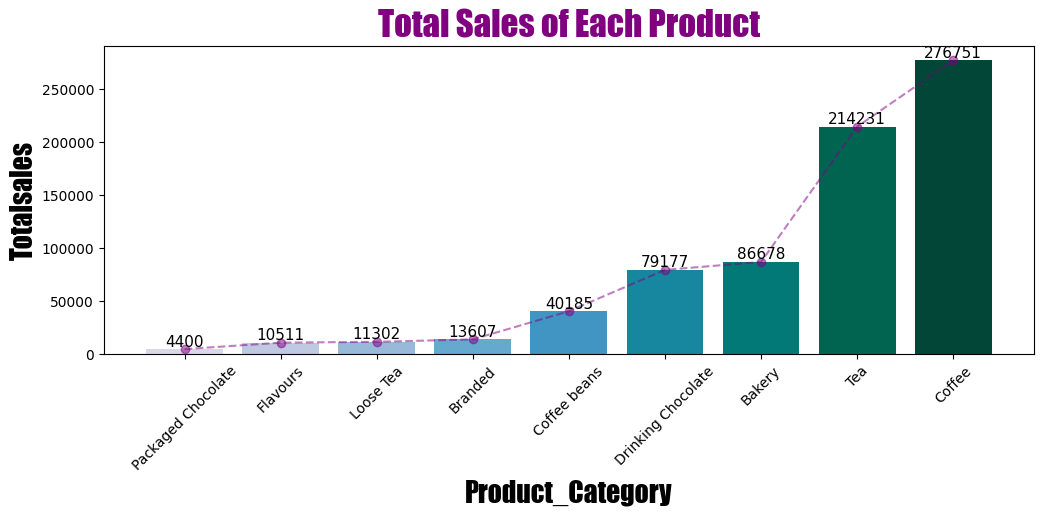

In [10]:
# ----------------------------------------------------------------------------------------------------------------------
seq= np.linspace(0.2,1,9)
cm = plt.cm.PuBuGn(seq)
#----------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(12,4))
plt.bar(df['product_category'],df['totalsales'],color=cm)
plt.plot(df['totalsales'],marker = 'o',color='purple',alpha = 0.5,ls='dashed')

#------------------------------------annotation---------------------------------------------------------------------------------

for i in range(len(df['product_category'])):
    plt.annotate(text = df['totalsales'][i],xy =( i,df['totalsales'][i]),
                 horizontalalignment='center',
                 verticalalignment='bottom',size=11)
    
# ----------------------------------------------------------------------------------------------------------------------------
plt.title('Total Sales of Each Product',
          fontsize = 25,
          color = 'purple',
          fontname = 'impact')
plt.xticks(rotation=45)
plt.xlabel('Product_Category',
           size = 20,
           fontname = 'impact')
plt.ylabel('Totalsales',
           size=20,
           fontname = 'impact')
plt.show()

In [29]:
# Create a query that summarizes the total sales for each day.

In [11]:
query = '''select date(transaction_date) as Daily ,sum(transaction_qty * unit_price) as totalsales from coffee_shop
group by Daily
order by totalsales desc
limit 10;'''

In [12]:
df = coffee_shop.select_query(query)

In [13]:
df

,Daily,totalsales
0,2023-06-19,6719
1,2023-06-13,6536
2,2023-06-08,6447
3,2023-06-17,6367
4,2023-06-18,6320
5,2023-06-27,6319
6,2023-06-16,6313
7,2023-06-24,6214
8,2023-06-26,6176
9,2023-06-09,6131


In [14]:
date = ['19 june 2023','12 june 2023','08 june 2023','17 june 2023','18 june 2023','27 june 2023','16 june 2023','24 june 2023','26 june 2023','09 june 2023']

In [15]:
arr = np.array(date)

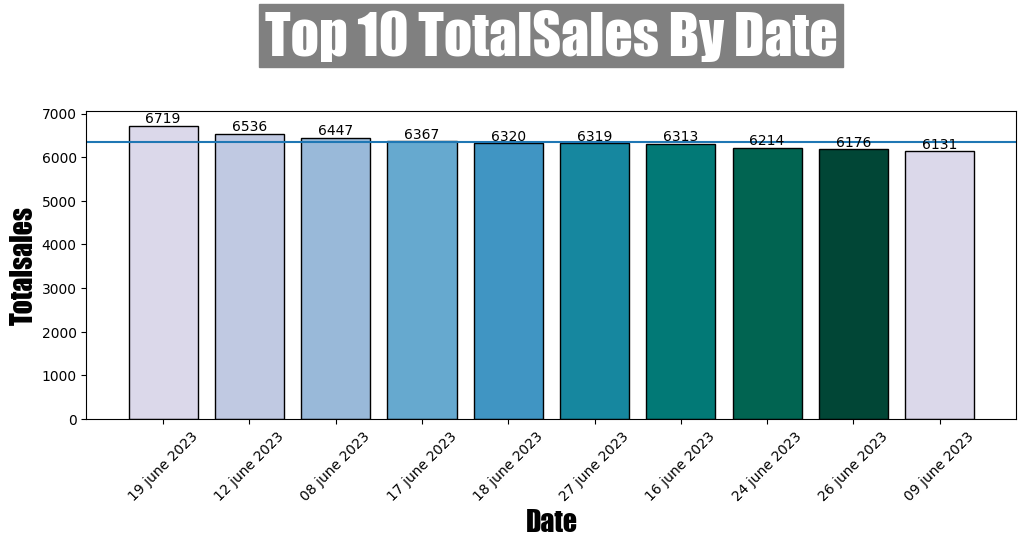

In [25]:
seq= np.linspace(0.2,1,9)
cm = plt.cm.PuBuGn(seq)
plt.figure(figsize=(12,4))
plt.bar(arr,df['totalsales'],color=cm,edgecolor='black')
plt.axhline(y=np.mean(df['totalsales']))

for i in range(len(arr)):
    plt.annotate(text=df['totalsales'][i],xy=(i,df['totalsales'][i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.title('Top 10 TotalSales By Date',
          fontsize = 40,color = 'white',
          backgroundcolor = 'grey',
          pad = 40,
          fontname = 'impact')

plt.xticks(rotation=45)
plt.xlabel('Date',size = 20,fontname = 'impact')
plt.ylabel('Totalsales',size=20,fontname = 'impact')
plt.show()

In [30]:
#  Write a query to find the top 5 products by total sales volume

In [31]:
query = '''select product_id,sum(transaction_qty * unit_price) as totalsales,sum(transaction_qty) total_qty from coffee_shop
group by product_id
order by total_qty desc
limit 5 ;'''

In [32]:
df = coffee_shop.select_query(query)

In [33]:
df

,product_id,totalsales,total_qty
0,50,14178,4726
1,59,23390,4678
2,54,13995,4665
3,38,18480,4620
4,44,13734,4578


In [34]:
product = ['59','61','38','39','36']

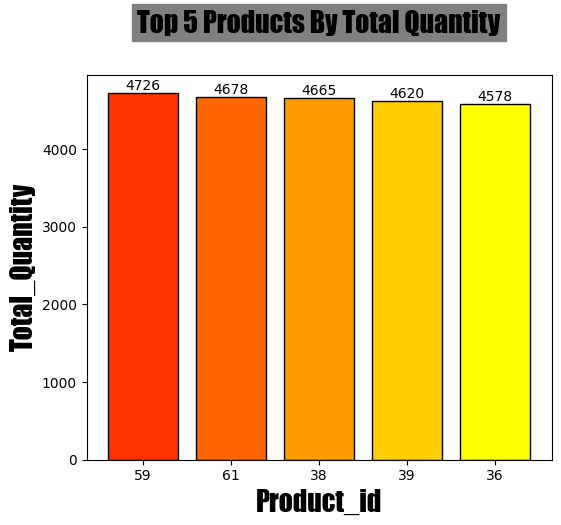

In [37]:
plt.figure(figsize=(6,5))

seq= np.linspace(0.2,1,5)
cm = plt.cm.autumn(seq)

plt.bar(product,df['total_qty'],color = cm,edgecolor='black')

for i in range(len(product)):
    plt.annotate(text = df['total_qty'][i],xy = (i,df['total_qty'][i]),horizontalalignment='center',verticalalignment='bottom')

plt.title('Top 5 Products By Total Quantity',fontsize=20,fontname='impact', backgroundcolor = 'grey',pad = 30)

plt.ylabel('Total_Quantity',fontsize=20,fontname='impact')

plt.xlabel('Product_id',fontsize=20,fontname='impact')

plt.show()

In [38]:
query = '''select product_id,sum(transaction_qty * unit_price) as totalsales,sum(transaction_qty) total_qty from coffee_shop
group by product_id
order by totalsales desc
limit 5 ;'''

In [39]:
df = coffee_shop.select_query(query)

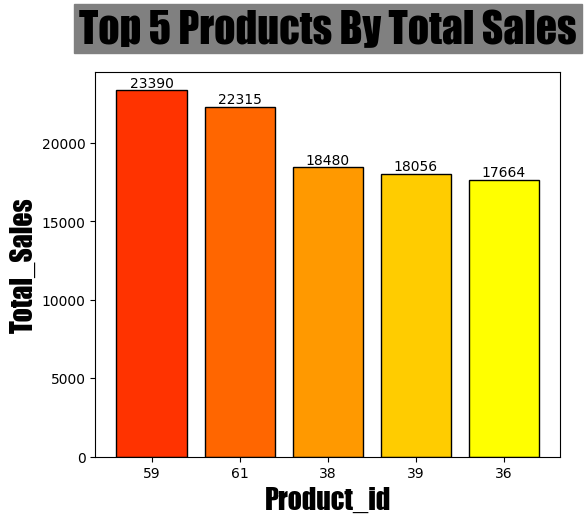

In [43]:
plt.figure(figsize=(6,5))

seq= np.linspace(0.2,1,5)
cm = plt.cm.autumn(seq)

plt.bar(product,df['totalsales'],color = cm,edgecolor='black')

for i in range(len(product)):
    plt.annotate(text = df['totalsales'][i],xy = (i,df['totalsales'][i]),horizontalalignment='center',verticalalignment='bottom')

plt.title('Top 5 Products By Total Sales',fontsize=30,fontname='impact',pad = 20,backgroundcolor = 'grey')

plt.ylabel('Total_Sales',fontsize=20,fontname='impact')

plt.xlabel('Product_id',fontsize=20,fontname='impact')

plt.show()

In [ ]:
# Generate a report that shows the total sales for each store location.

In [44]:
query = '''select store_location,sum(transaction_qty * unit_price) as totalsales from coffee_shop
group by store_location;'''

In [45]:
df = coffee_shop.select_query(query)

In [46]:
df

,store_location,totalsales
0,Lower Manhattan,242818
1,Hell's Kitchen,249089
2,Astoria,244935


In [51]:
l = ['Lower Manhattan','Hells kitchen','Astoris']

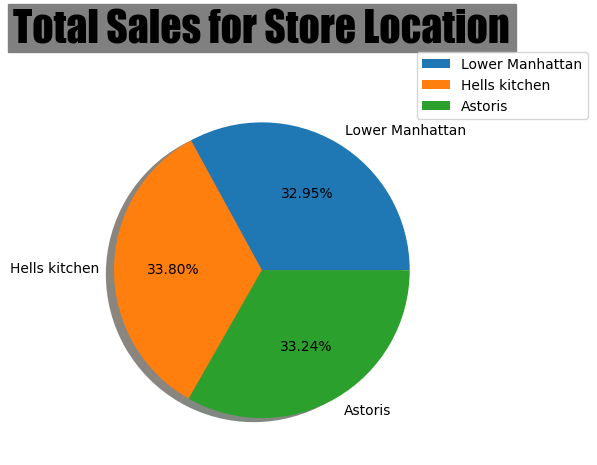

In [54]:
plt.pie(df['totalsales'],labels = l,autopct='%1.2f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.legend(loc = "center left",
          bbox_to_anchor=(0.9, 0.3,1, 1.4))

plt.title('Total Sales for Store Location',fontsize=30,fontname='impact',backgroundcolor = 'grey',pad=30)

plt.show()

In [ ]:
# Create a query to determine which product type has the highest average unit price.

In [55]:
query = '''select product_type,round(avg(unit_price),1) as Avg_unit_price from coffee_shop
group by product_type
order by Avg_unit_price desc;'''

In [56]:
df = coffee_shop.select_query(query)

In [57]:
df

,product_type,Avg_unit_price
0,Premium Beans,34.1
1,Clothing,27.9
2,Organic Beans,20.5
3,Gourmet Beans,18.6
4,House blend Beans,18.0
5,Espresso Beans,17.4
6,Housewares,13.4
7,Green beans,10.0
8,Drinking Chocolate,9.9
9,Chai tea,9.9


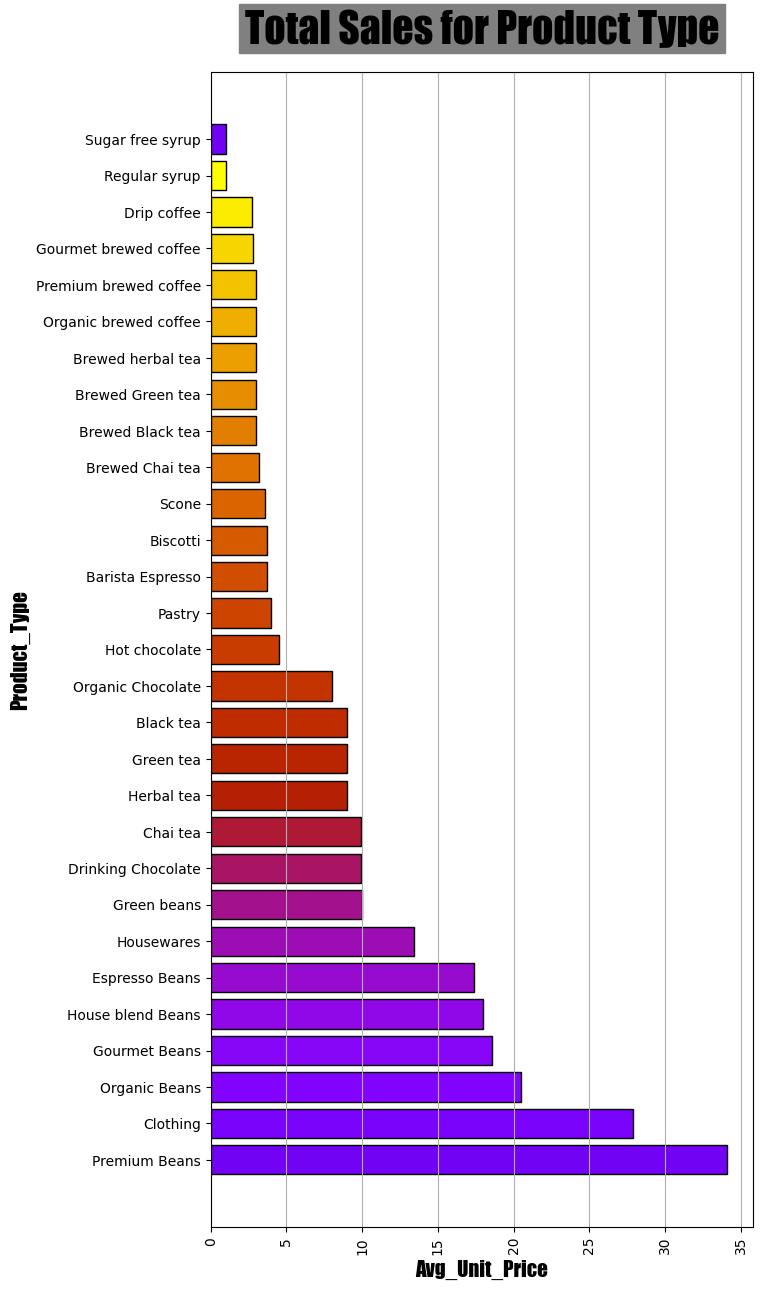

In [80]:
plt.figure(figsize=(7,15))

seq= np.linspace(0.2,1,28)
cm = plt.cm.gnuplot(seq)

plt.barh(df['product_type'],df['Avg_unit_price'],color=cm,edgecolor='black')



plt.grid(axis = 'x')
plt.title('Total Sales for Product Type',fontsize=30,fontname='impact',backgroundcolor='grey',pad = 20)
plt.ylabel('Product_Type',fontsize=15,fontname='impact')
plt.xlabel('Avg_Unit_Price',fontsize=15,fontname='impact')
plt.xticks(rotation=90)
plt.show()

In [81]:
# Write a query to analyze the sales trend over the first week of January 2023.

In [82]:
query='''select date(transaction_date) as Daily,sum(transaction_qty * unit_price) as totalsales from coffee_shop
group by Daily
limit 7;'''

In [83]:
df = coffee_shop.select_query(query)

In [84]:
df

,Daily,totalsales
0,2023-01-01,4689
1,2023-01-02,2537
2,2023-01-03,2710
3,2023-01-04,2335
4,2023-01-05,2540
5,2023-01-06,2400
6,2023-01-07,2747


In [85]:
date = ['01 january 2023','02 january 2023','03 january 2023','04 january 2023','05 january 2023','06 january 2023','07 january 2023']

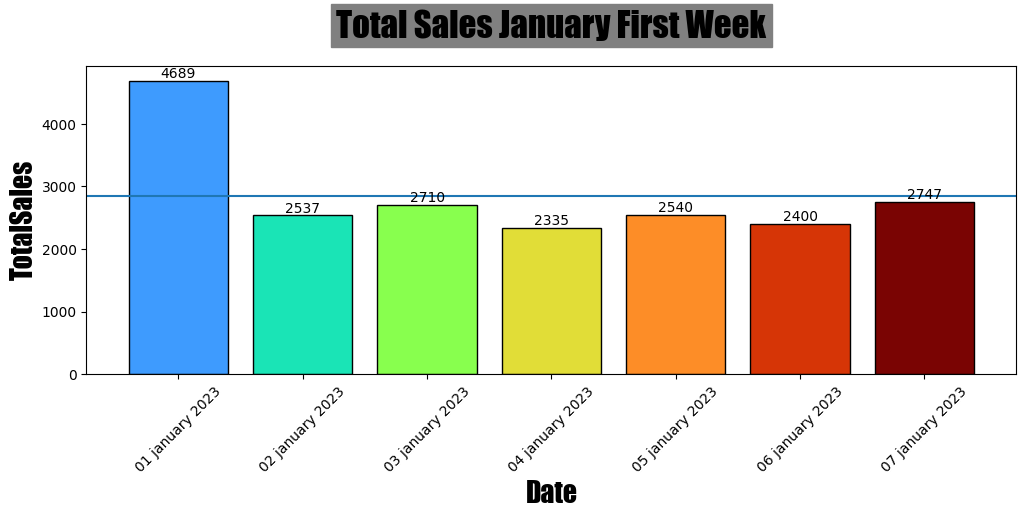

In [88]:
seq= np.linspace(0.2,1,7)
cm = plt.cm.turbo(seq)
plt.figure(figsize=(12,4))
plt.bar(date,df['totalsales'],color=cm,edgecolor='black')
plt.axhline(y=np.mean(df['totalsales']))

for i in range(len(date)):
    plt.annotate(text=df['totalsales'][i],xy=(i,df['totalsales'][i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.title('Total Sales January First Week',
          fontsize = 25,color = 'black',
          backgroundcolor = 'grey',
          pad = 20,
          fontname = 'impact')

plt.xticks(rotation=45)
plt.xlabel('Date',size = 20,fontname = 'impact')
plt.ylabel('TotalSales',size=20,fontname = 'impact')
plt.show()

In [ ]:
# Assume a discount of 10% is applied to all products in the "Bakery" category. Write a query to calculate 
#  the total sales amount after applying this discount for the Bakery products

In [109]:
query = '''select product_type,round((totalsales - totalsales*10/100),2) as after_discount from  
(select product_type,sum(transaction_qty * unit_price) as totalsales,product_category from coffee_shop
group by product_type,product_category) t
where product_category = 'Bakery';'''

In [110]:
df = coffee_shop.select_query(query)

In [111]:
df

,product_type,after_discount
0,Scone,33796.80
1,Biscotti,19068.30
2,Pastry,25145.10


In [112]:
l = ['Scone','Biscotti','Pastry']

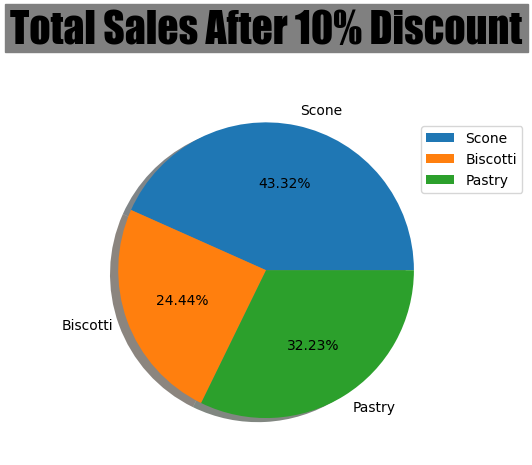

In [113]:
plt.pie(df['after_discount'],labels = l,autopct='%1.2f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.legend(loc = "center left",
          bbox_to_anchor=(0.9, 0.3,1, 1))
plt.title('Total Sales After 10% Discount',fontsize=30,fontname='impact',backgroundcolor = 'grey',pad=30)

plt.show()

In [ ]:
# Write a query to find the average number of transactions per store location.

In [103]:
query = '''select store_id,store_location,sum(transaction_qty) as Total_Quantity from coffee_shop
group by store_id,store_location ;'''

In [104]:
df = coffee_shop.select_query(query)

In [105]:
df

,store_id,store_location,Total_Quantity
0,5,Lower Manhattan,71980
1,8,Hell's Kitchen,71935
2,3,Astoria,71184


In [106]:
l= ['Lower Manhattan','Hells Kitchen','Astoria']

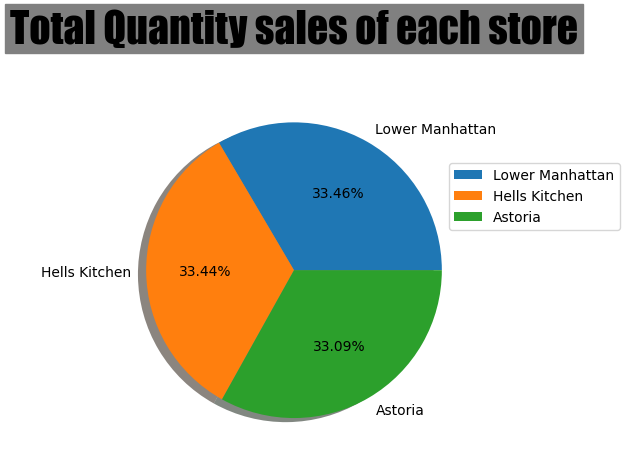

In [107]:

plt.pie(df['Total_Quantity'],labels = l,autopct='%1.2f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.legend(loc = "center left",
          bbox_to_anchor=(0.9, 0.2,1, 1))

plt.title('Total Quantity sales of each store',fontsize=30,fontname='impact',backgroundcolor = 'grey',pad=30)

plt.show()